In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import re
import yaml

from IPython.display import Image, display
import ROOT

In [5]:
# Intialise the files
with open('./analysis_config.yaml', "r") as config_file:
        config = yaml.safe_load(config_file)

filenameslist = []
filetypeslist = []
for s_name, s_info in config['samples'].items():
    filenameslist += [f'./OutHistoFiles/hists_{s_name}.root']
    filetypeslist += [s_info['type']]

# colourlist = [ROOT.kRed, ROOT.kRed+2, ROOT.kYellow+4, ROOT.kYellow-1, ROOT.kYellow-5, ROOT.kYellow-6, ROOT.kYellow-8]
open_infiles = [ROOT.TFile.Open(filename) for filename in filenameslist]

for filename, filetype in list(zip(filenameslist, filetypeslist)):
    print(filename, filetype)

./OutHistoFiles/hists_DYToLL_M50_PU0.root dytoll
./OutHistoFiles/hists_DYToLL_M50_PU200.root dytoll
./OutHistoFiles/hists_MinBias_PU200.root qcd


In [6]:
def plotisocount_perfile_perisocat(histfile, isostr):
    wordstr = 'a-zA-Z0-9'
    digstr = '0-9'
    histreg = re.compile(f'([{wordstr}]+)_([{wordstr}]+)_([{wordstr}]+)_El1_Re_dRmin([{digstr}]+)_([{digstr}]+)_dRmax([{digstr}]+)_([{digstr}]+)_{isostr}_puppiIso')

    dRmins = []
    dRmaxs = []
    isofracs = []

    # Loop over the histograms and find matching histograms
    for histKey in histfile.GetListOfKeys():
        histname = histKey.GetName()
        histregmatch = re.match(histreg, histname)
        if histregmatch:
            dRminval = float(histregmatch.group(4) + '.' + histregmatch.group(5))
            dRmaxval = float(histregmatch.group(6) + '.' + histregmatch.group(7))
            dRmins.append(dRminval)
            dRmaxs.append(dRmaxval)
            histObj = histKey.ReadObj()
            totalentries = histObj.GetEntries()
            isobin = histObj.GetBinContent(1)
            isofracval = isobin / totalentries if totalentries > 0 else 0
            isofracs.append(isofracval)

    print(len(dRmins), dRmins)
    print(len(dRmaxs), dRmaxs)
    print(len(isofracs), isofracs)

    # Regroup the data by dRmax
    grouped_data = {}
    for drmin, drmax, isofrac in zip(dRmins, dRmaxs, isofracs):
        if drmax not in grouped_data:
            grouped_data[drmax] = []
        grouped_data[drmax].append((drmin, isofrac))
    

    # Create a scatter plot
    fig, ax = plt.subplots()
    for drmax, values in grouped_data.items():
        x = [val[0] for val in values]
        y = [val[1] for val in values]
        scatter = ax.scatter(x, y, label=f'dRmax = {drmax}')
    ax.set_xlabel('dRmin')
    ax.set_ylabel('isolated fraction')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'./nb_plots/{isostr}_perfile_{histfile.GetName().split('/')[-1][:-5]}.png')
    plt.show()
    plt.close(fig)


def plotisocount_perfile(histfile):
    for isostr in ['isotot', 'iso11', 'iso13', 'iso22', 'iso130', 'iso211']:
        plotisocount_perfile_perisocat(histfile, isostr)

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9170674294800346, 0.88659

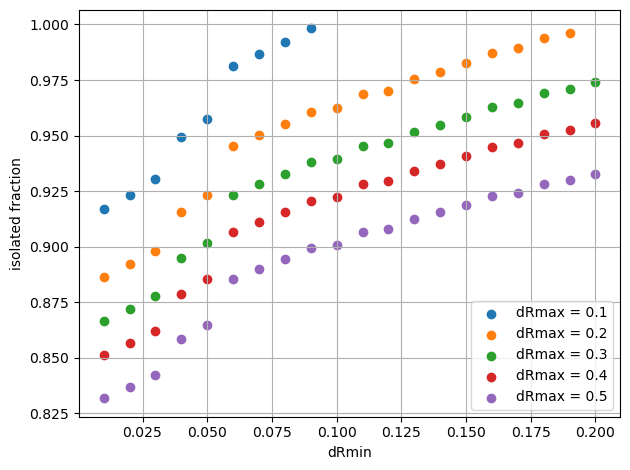

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9937332907238673, 0.99338

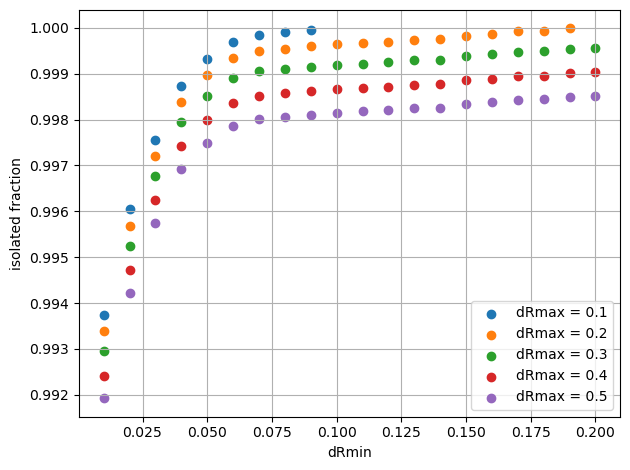

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9999688223419098, 0.99995

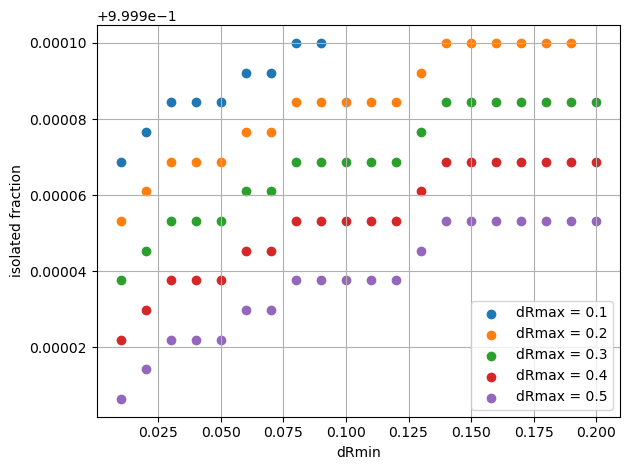

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9494064553341076, 0.92367

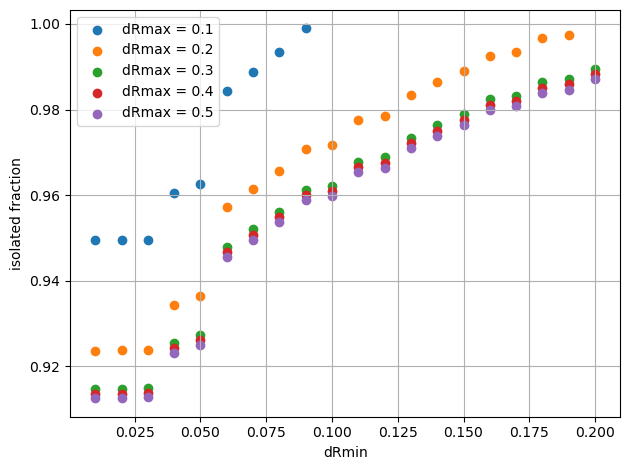

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9785887433065465, 0.97642

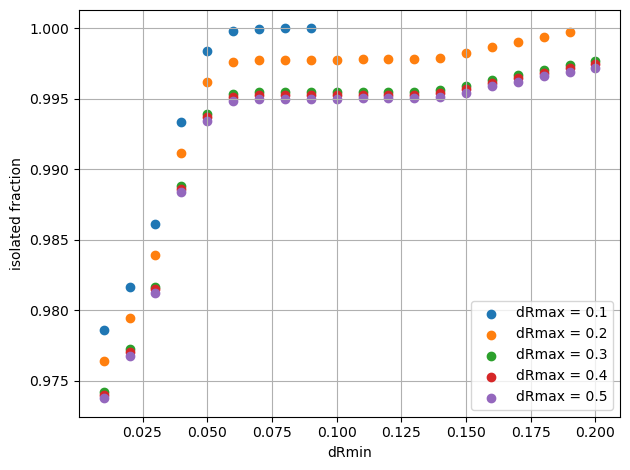

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9909740679828835, 0.98248

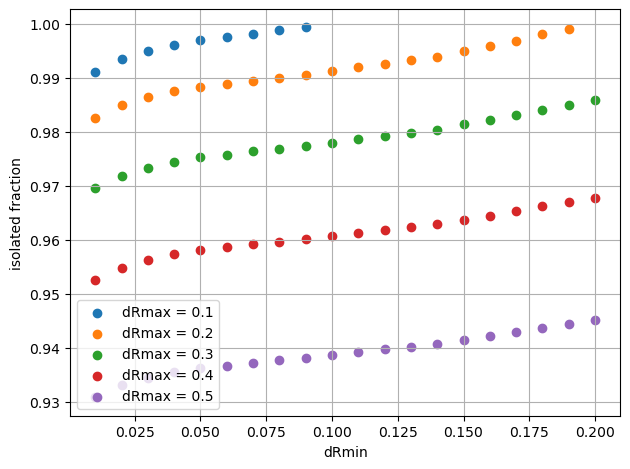

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.8320244069004424, 0.68659

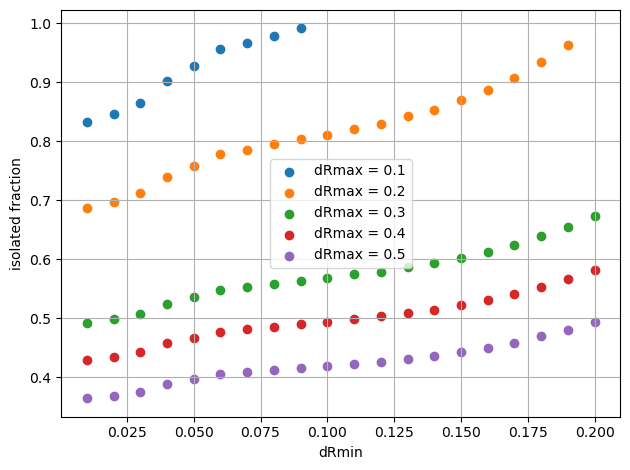

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9952418420974495, 0.99344

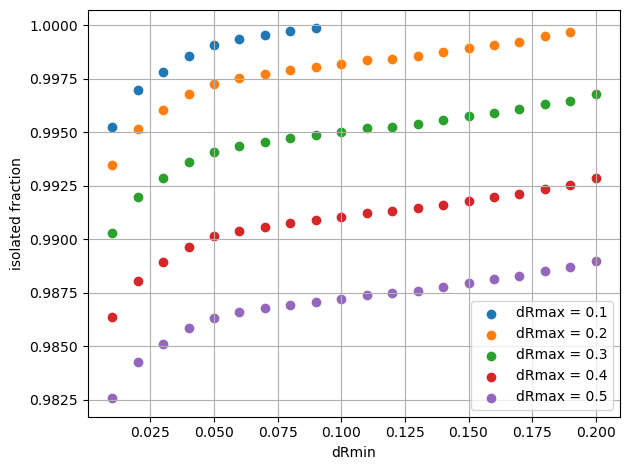

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9998738086047686, 0.99971

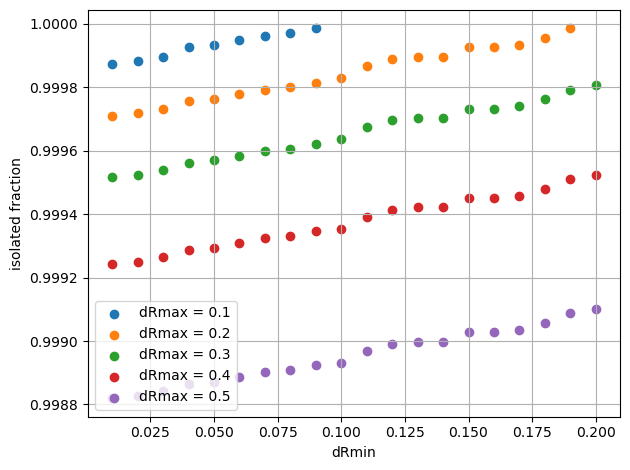

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9372902995932183, 0.84026

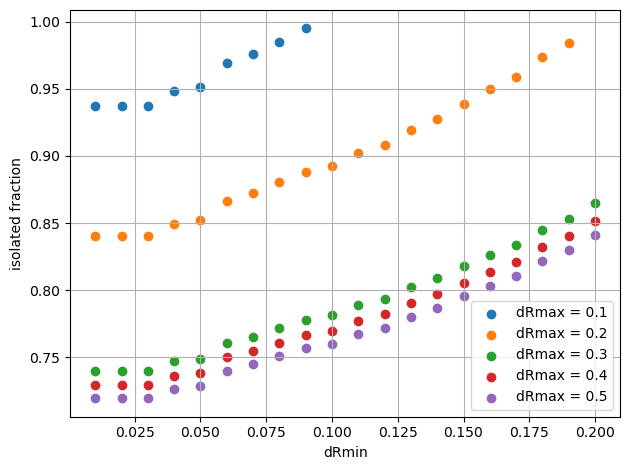

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9078877045042905, 0.85710

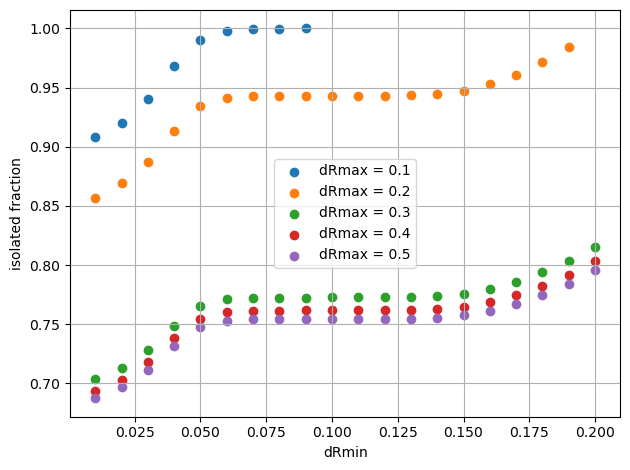

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9784583865316666, 0.92988

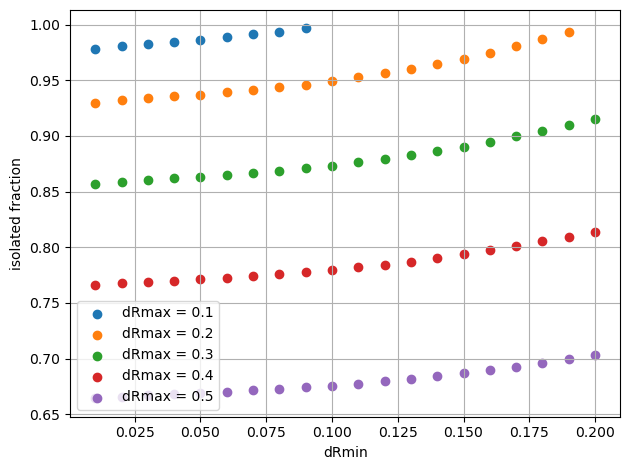

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.3533403088239957, 0.27933

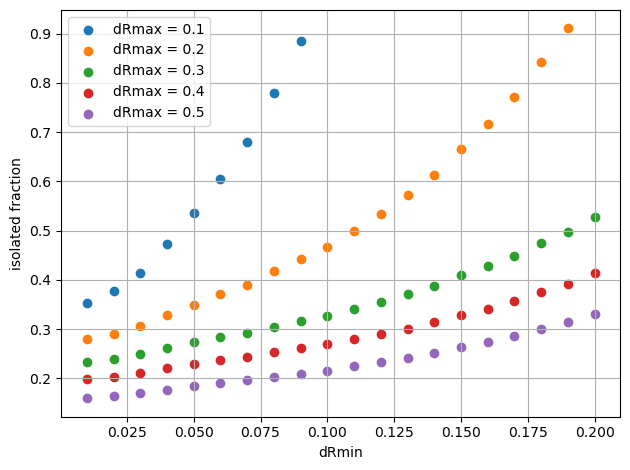

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.9374425314689749, 0.91179

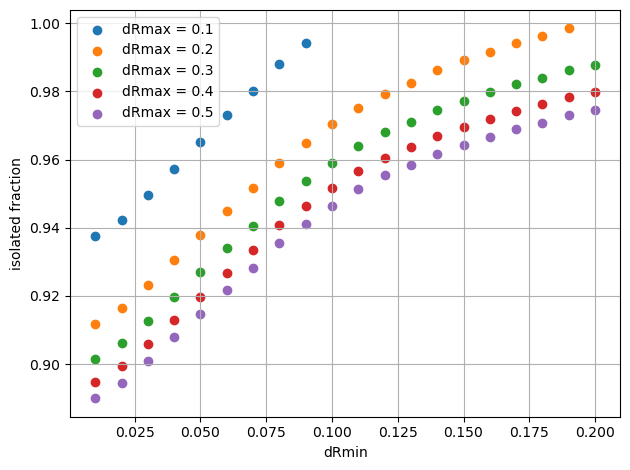

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.998763435746219, 0.996575

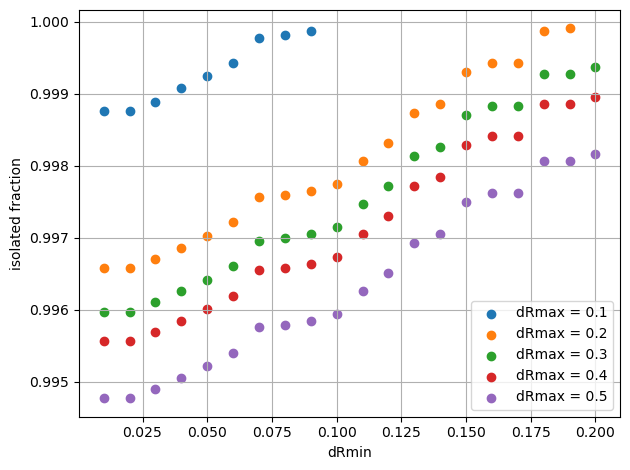

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.7568090300897302, 0.57842

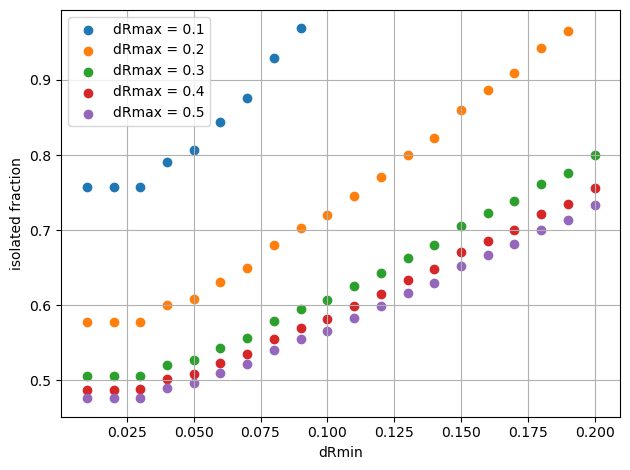

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.6208503757252924, 0.57135

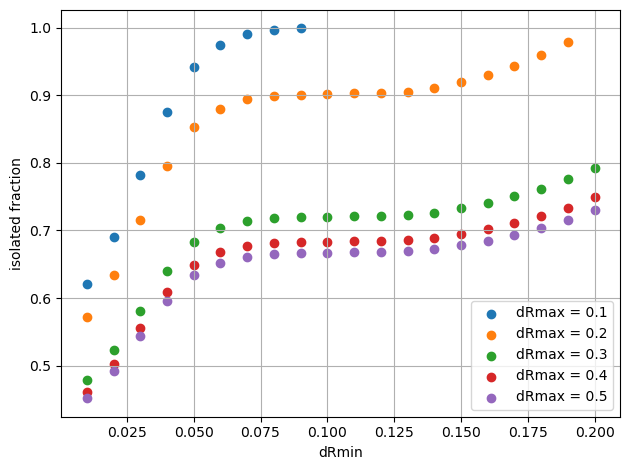

88 [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]
88 [0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5]
88 [0.5311519071625607, 0.40774

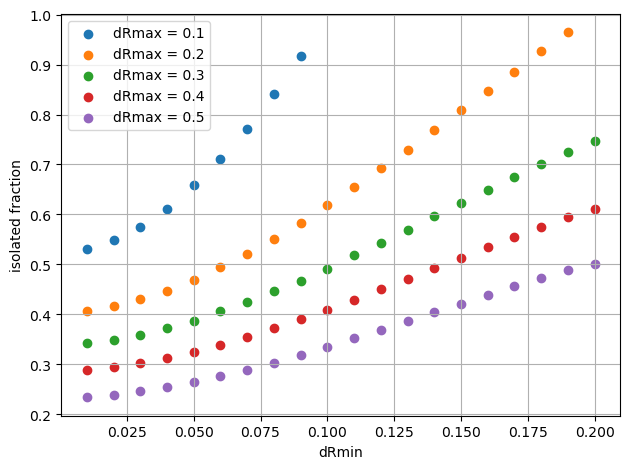

In [7]:
for open_infile in open_infiles:
    plotisocount_perfile(open_infile)